# Лабораторная работа 213: Гармонический анализ сигналов

In [ ]:
import numpy as np
import matplotlib.pyplot as polt 
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

In [132]:
str_index = ["Меандр, В", "C1, В", "C2, В", "C3, В"]

A_proc_50 = np.array([0.8043, 0.2776, 0.1709, 0.121, 0.09253, 0.07117])
A_proc_75 = np.array([0.4786, 0.3114, 0.2117, 0.09253, 0.000, 0.05694])
A_proc_25 = np.array([0.5053, 0.3060, 0.2117, 0.09786, 0.000, 0.04982])

odd_numbers = np.array([2*i + 1 for i in range(0, 6)])
even_numbers = np.array([2*i for i in range(1, 7)])
numbers = np.array([i for i in range (1, 7)])

# Расчет коэф. C 

$C_{fur-th} = \frac{sin(\tau \pi n/T)}{n}$, где
* $n$ - номер гармоники
* $\frac{T}{\tau}$ - скважность

$C_{fur-pr} = \frac{A}{A_0}$

### Скважность = 2 (50%)

In [133]:
A0 = np.mean([996.4, 989.3, 996.4, 989.3])*10**(-3) # среднее по квадрату

c_fur_th = np.abs(np.sin(0.5*np.pi*odd_numbers)/odd_numbers)
c_fur_pr = A_proc_50 / A_proc_50[0] # (A0)
df = pd.DataFrame([c_fur_th, c_fur_pr], index=["C_th", "C_pr"], columns=odd_numbers)
df

,1,3,5,7,9,11
C_th,1.0,0.333333,0.200000,0.142857,0.111111,0.090909
C_pr,1.0,0.345145,0.212483,0.150441,0.115044,0.088487


дальше эксперимент с теорией не сходится))

### Скважность = 4/3 (75%)

In [134]:
A0 = np.mean([498.2, 498.2, 498.2, 498.2])*10**(-3) # среднее по квадрату

c_fur_th = np.abs(np.sin(0.75*np.pi*odd_numbers)/odd_numbers)
c_fur_pr = A_proc_75 / A_proc_75[0] # (A0)
df = pd.DataFrame([c_fur_th, c_fur_pr], index=["C_th", "C_pr"], columns=numbers)
df

,1,2,3,4,5,6
C_th,0.707107,0.235702,0.141421,0.101015,0.078567,0.064282
C_pr,1.000000,0.650648,0.442332,0.193335,0.000000,0.118972


### Скважность = 4 (25%)

In [135]:
A0 = np.mean([491.1, 498.2, 491.1, 494.7])*10**(-3) # среднее по квадрату

c_fur_th = np.abs(np.sin(0.25*np.pi*odd_numbers)/odd_numbers)
c_fur_pr = A_proc_25 / A_proc_25[0] # (A0)
df = pd.DataFrame([c_fur_th, c_fur_pr], index=["C_th", "C_pr"], columns=numbers)
df

,1,2,3,4,5,6
C_th,0.707107,0.235702,0.141421,0.101015,0.078567,0.064282
C_pr,1.000000,0.605581,0.418959,0.193667,0.000000,0.098595


# Расчет коэф. $\alpha$

дичь какая-то...

$\alpha_{th}=\frac{1}{\sqrt{1+(\omega C R)^2}}$

$\alpha_{pr}=\frac{A}{A_0}$

In [136]:
nu = np.array([8.009, 23.98, 40.05, 56.01, 71.98, 88.03]) * 10**(3)
omega = 2*np.pi*nu

R = 10000
C1 = 100 * 10**(-12)
C2 = 200 * 10**(-12)
C3 = 530 * 10**(-12)

c1 = np.array([0.793, 0.263, 0.145, 0.096, 0.071, 0.046])
c2 = np.array([0.790, 0.249, 0.128, 0.082, 0.057, 0.039])
c3 = np.array([0.750, 0.192, 0.085, 0.056, 0.028, 0.021])

In [137]:
A0 = np.mean([975.1, 989.3, 982.2, 966])*10**(-3) # среднее по квадрату

alpha_norm = 1/((1+(omega*C1*R)**2)**0.5)[0]
alpha_th = 1/((1+(omega*C1*R)**2)**0.5)/alpha_norm
alpha_pr = c1 / c1[0] # (A0)

df = pd.DataFrame([alpha_th, alpha_pr], index=["alpha_th", "alpha_pr"], columns=numbers)
df


,1,2,3,4,5,6
alpha_th,1.0,0.990090,0.970994,0.944486,0.912301,0.876172
alpha_pr,1.0,0.331652,0.182850,0.121059,0.089533,0.058008


In [138]:
A0 = np.mean([960, 989.3, 982.2, 968])*10**(-3) # среднее по квадрату

alpha_norm = 1/((1+(omega*C2*R)**2)**0.5)[0]
alpha_th = 1/((1+(omega*C2*R)**2)**0.5)/alpha_norm
alpha_pr = c2 / c2[0] # (A0)

df = pd.DataFrame([alpha_th, alpha_pr], index=["alpha_th", "alpha_pr"], columns=numbers)
df

,1,2,3,4,5,6
alpha_th,1.0,0.962309,0.897764,0.821884,0.745369,0.673983
alpha_pr,1.0,0.315190,0.162025,0.103797,0.072152,0.049367


In [139]:
A0 = np.mean([975.1, 989.3, 989.3, 960])*10**(-3) # среднее по квадрату

alpha_norm = 1/((1+(omega*C3*R)**2)**0.5)[0]
alpha_th = 1/((1+(omega*C3*R)**2)**0.5)/alpha_norm
alpha_pr = c3 / c3[0] # (A0)

df = pd.DataFrame([alpha_th, alpha_pr], index=["alpha_th", "alpha_pr"], columns=numbers)
df

,1,2,3,4,5,6
alpha_th,1.0,0.808734,0.620864,0.489030,0.398484,0.334143
alpha_pr,1.0,0.256000,0.113333,0.074667,0.037333,0.028000


In [140]:
nu = np.array([8, 24, 40, 56, 72, 88])
str_nu = [str(i)+" кГц" for i in nu]

# Вычисление коэффициентов пропускания

### Первые 6 гармоник для меандра, прошедшего через различные фильтры

In [141]:
df = pd.DataFrame([A_proc_50, c1, c2, c3], index=str_index, columns=str_nu)
df

,8 кГц,24 кГц,40 кГц,56 кГц,72 кГц,88 кГц
"Меандр, В",0.8043,0.2776,0.1709,0.121,0.09253,0.07117
"C1, В",0.7930,0.2630,0.1450,0.096,0.07100,0.04600
"C2, В",0.7900,0.2490,0.1280,0.082,0.05700,0.03900
"C3, В",0.7500,0.1920,0.0850,0.056,0.02800,0.02100


### Коэффициенты пропускания для разных фильтров

In [142]:
a  = np.array([c1, c2, c3])/A_proc_50[0]
df = pd.DataFrame(np.round(a,2), index=str_index[1:], columns = str_nu)
df

,8 кГц,24 кГц,40 кГц,56 кГц,72 кГц,88 кГц
"C1, В",0.99,0.33,0.18,0.12,0.09,0.06
"C2, В",0.98,0.31,0.16,0.10,0.07,0.05
"C3, В",0.93,0.24,0.11,0.07,0.03,0.03


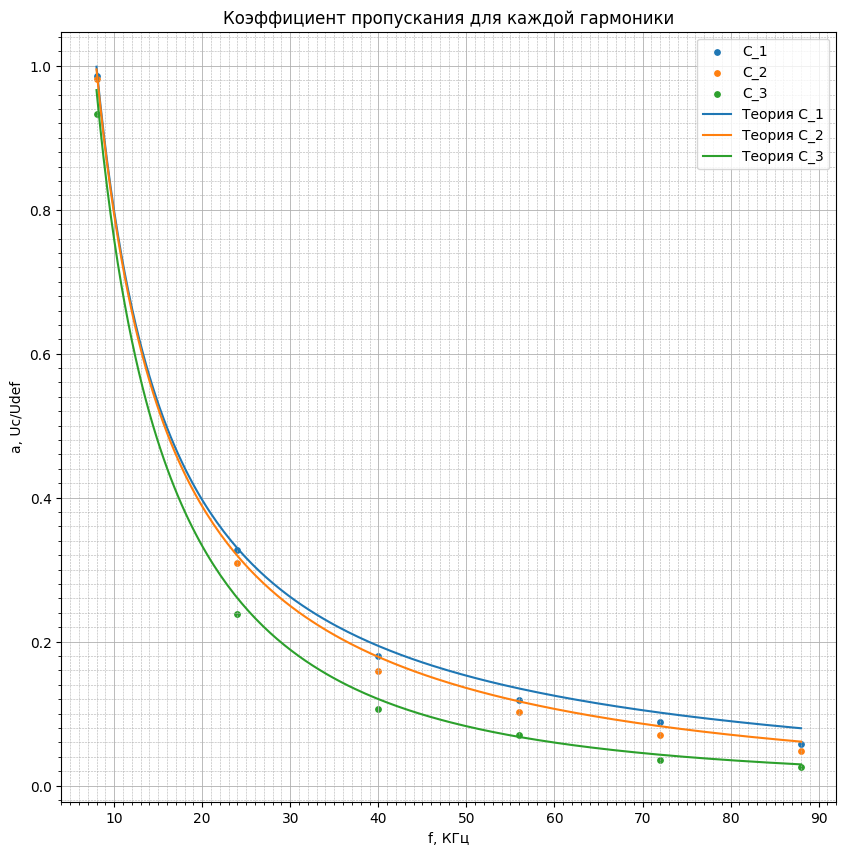

In [ ]:
fig, axs = polt.subplots(1,1, figsize = (10,10))
start: int = nu[0]
end: int = nu[-1]
x = np.linspace(start, end, 200)

axs.set_title("Коэффициент пропускания для каждой гармоники")
axs.set_xlabel("f, КГц")
axs.set_ylabel("a, Uc/Udef")

labels_th = [f"Теория C_{i + 1}" for i in range(3)]
labels_pr = [f"C_{i + 1}" for i in range(3)]

# EXPERIMENT
for i in range(3):
    axs.scatter(nu, a[i], s = 15, label=labels_pr[i])

# THEORY
for i in range(3):
    axs.plot(x, start/x * (1 + (2 * np.pi * x * np.array([C1, C2, C3])[i] * R * 10**3)**2)**(-0.5), 
             label=labels_th[i])

axs.legend()
axs.minorticks_on()
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
polt.grid(which = 'major', linewidth = 0.6)